# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


## Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

<img src="LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=800>

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:
## Importing Packages

### Using Custom PyPi Package - BroadSteel DataScience (bs_ds)


<img src="https://bs-ds.readthedocs.io/en/latest/_images/bs_ds_logo.png" width=200>

- **Used several EDA functions from bs_ds.bamboo module:**
    - inspect_df
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.inspect_df
    - check_null
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_null
    - check_unique
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_unique
    - check_column
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_column
    - check_numeric
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_numeric
    - big_pandas
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.big_pandas
    - ignore_warnings
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.ignore_warnings
    - drop_cols
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.drop_cols

In [1]:
# Import custom python package BroadSteel DataScience (bs_ds_)
from bs_ds.imports import *
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric, big_pandas, ignore_warnings

bs_ds  v0.9.2 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules use: from bs_ds.imports import *



Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


In [2]:
import bs_ds as bs

from bs_ds.imports import *

In [3]:
# Enabling full-sized dataframes and info rows
big_pandas()

# Turning off warnings for function deprecations
ignore_warnings()

# Defining colorscheme for notebook
plt.style.use('dark_background')

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.max_info_columns=500
display.precision=4


## Loading the dataset and removing unrelated columns

In [4]:
# Dataset Links
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [5]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [6]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

Removed New.
Removed Days.
Removed Recidivism Type.


### Save original names vs short names in column_legend
- then map names onto columns

In [7]:
print(df.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')


In [8]:
# New short-hand names to use
colnames_short = ('yr_released','report_year','race_ethnicity',
                  'age_released','crime_class','crime_type',
                  'crime_subtype','release_type','super_dist',
                  'recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


# SCRUB / EXPLORE
## EDA with Pandas_Profiling

In [9]:
import pandas_profiling as pp

In [10]:
pp.ProfileReport(df)

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 2).')
  correlation_name=correlation_name, error=error


## ADDRESSING NULL VALUES

In [11]:
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0
report_year,0,26020,0
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0
crime_type,0,26020,0
crime_subtype,0,26020,0
release_type,1762,26020,6.772
super_dist,9581,26020,36.82


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_released, race_ethnicity, and release_type.**

In [12]:
# Filling NA's in super_dist and release_type
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)
df['super_dist'].fillna("unknown", inplace=True)
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0
report_year,0,24225,0
race_ethnicity,0,24225,0
age_released,0,24225,0
crime_class,0,24225,0
crime_type,0,24225,0
crime_subtype,0,24225,0
release_type,0,24225,0
super_dist,0,24225,0


___
## COMBINING AND REMAPPING CLASSES

### df['race_ethnicity']

In [13]:
check_unique(df,['race_ethnicity'])


---------------------------

race_ethnicity Type: object
Number unique values: 11.


,race_ethnicity
White - Non-Hispanic,16460
Black - Non-Hispanic,5687
White - Hispanic,1365
American Indian or Alaska Native - Non-Hispanic,463
Asian or Pacific Islander - Non-Hispanic,175
Black - Hispanic,36
American Indian or Alaska Native - Hispanic,19
White -,12
Asian or Pacific Islander - Hispanic,5
Black -,2


- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [14]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)

In [15]:
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White,25-34,D Felony,Property,Theft,Discharged – End of Sentence,unknown,Yes,No,Male
2,2010,2013,White,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,unknown,Yes,No,Male


In [16]:
check_unique(df,['race_ethnicity'])


---------------------------

race_ethnicity Type: object
Number unique values: 5.


,race_ethnicity
White,16472
Black,5725
Hispanic,1365
American Native,482
Asian or Pacific Islander,180


### df['crime_class']

- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [17]:
check_unique(df,['crime_class'])


---------------------------

crime_class Type: object
Number unique values: 14.


,crime_class
D Felony,9786
C Felony,6453
Aggravated Misdemeanor,4327
B Felony,1716
Felony - Enhancement to Original Penalty,1488
Felony - Enhanced,220
Serious Misdemeanor,139
Special Sentence 2005,69
Felony - Mandatory Minimum,10
Other Felony,6


In [18]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

### df['age_released']

- **Encoding age groups as ordinal**

In [19]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)

### Remapping binary categories df[['recidivist','target_pop','sex']]

In [20]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

___
## ENGINEERING FEATURES
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [21]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [22]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)

### Dropping all  values replaced with np.nan

In [23]:
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0
report_year,0,24225,0
race_ethnicity,1,24225,0.004
age_released,0,24225,0
crime_class,18,24225,0.074
crime_type,0,24225,0
crime_subtype,0,24225,0
release_type,0,24225,0
super_dist,0,24225,0


In [24]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
check_null(df)

,Null values,Total Values,Percent
Column,,,
index,0,24206,0
yr_released,0,24206,0
report_year,0,24206,0
race_ethnicity,0,24206,0
age_released,0,24206,0
crime_class,0,24206,0
crime_type,0,24206,0
crime_subtype,0,24206,0
release_type,0,24206,0


In [25]:
df.to_csv('Iowa_recidivism_features_pre-processing.csv')

## Processing Chosen Feature Columns

In [26]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [27]:
# Creating new dataframe ('df_to_split') to contain processed features for train_test_split
df_to_split=pd.DataFrame()

# MinMaxing Numerical Columns
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()    

max_sentence
age_released


In [28]:
# Convert categories to cat.codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category').cat.codes
    
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 12 columns):
max_sentence      24206 non-null float64
age_released      24206 non-null float64
yr_released       24206 non-null int8
race_ethnicity    24206 non-null int8
crime_class       24206 non-null int8
release_type      24206 non-null int8
crime_type        24206 non-null int8
crime_subtype     24206 non-null int8
target_pop        24206 non-null int8
sex               24206 non-null int8
super_dist        24206 non-null int8
felony            24206 non-null int8
dtypes: float64(2), int8(10)
memory usage: 614.7 KB


# FITTING AN INITIAL MODEL
## Surveying Potential Algorithms with bs_ds
- select_pca:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.select_pca
- thick_pipe:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.thick_pipe


In [29]:
from bs_ds.bs_ds import select_pca, thick_pipe

In [30]:
X =pd.get_dummies(df_to_split, columns=category_cols, drop_first=True)
y = df['recidivist']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#### Running select_pca to identify # of components that still explains 80% of variance

In [32]:
bs.ihelp(select_pca)

------------------------------------------------------------------------------------
------ HELP ------------------------------------------------------------------------

Help on function select_pca in module bs_ds.bs_ds:

select_pca(features, n_components_list=None)
    Takes features and list of n_components to run PCA on.
    Default value of n_components_lists= None tests 2 to n_features-1.
    
    Params:
    ----------
    features: pd.Dataframe
    n_components_list: List of n_components (ints) to test in PCA. Default = 2:n_features-1;
    
    returns:
    ----------
    pd.DataFrame, displays number of components and their respective
    explained variance ratio

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def select_pca(features, n_components_list=None):

    '''
    Takes features and list of n_components to run PCA on.
    Default value of n_components_lists= None tests 2 to n_features-1.

    Params:
    ----------
    features: pd.Dataframe
    n_components_list: List of n_components (ints) to test in PCA. Default = 2:n_features-1;

    returns:
    ----------
    pd.DataFrame, displays number of components and their respective
    explained variance ratio
    '''
    import numpy as np

    # from bs_ds import list2df
    from sklearn.decomposition import PCA

    # Create list to store results in
    results = [['Model','n_components', 'Explained_Variance_ratio_']]

    # If n_components_list == None, make it 1:n-1
    if n_components_list == None:
        n_components_list = list(range(2,features.shape[1]-1))

    # Loop through list of components to do PCA on
    for n in n_components_list:

        # Creat instance of PCA class
        pca = PCA(n_components=n)
        pca.fit_transform(features)

        # Create list of n_component and Explained Variance
        component_variance = ['PCA',n, np.sum(pca.explained_variance_ratio_)]

        # Append list results list
        results.append(component_variance)

        # Use list2df to display results in DataFrame
    return list2df(results)

```

In [33]:
select_pca(X_train) #,n_components_list=[range(10, X_train.shape[1]-1)])

,Model,n_components,Explained_Variance_ratio_
0,PCA,2,0.2170
1,PCA,3,0.2992
2,PCA,4,0.3689
3,PCA,5,0.4318
4,PCA,6,0.4900
5,PCA,7,0.5380
6,PCA,8,0.5752
7,PCA,9,0.6100
8,PCA,10,0.6423
9,PCA,11,0.6727


In [35]:
# # Running thick_pipe to test alogorithms
# thick_pipe(X_train, y_train, n_components=17)

### >>> Fast-Forwarding through trial and error:
- Regardless of changes to preprocessing and feature engineering, accuracy scores never increased about 0.68
- One major concern was the vast majority of our features are categorical.
    - Therefore, we investigated using another Machine Learning package, **CatBoost**

## FITTING AN INITIAL MODEL USING CatBoostClassifier

In [36]:
# Define X and y to split
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [37]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [38]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [41]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=3000, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
#                            task_type='GPU')

In [42]:
# Fitting Initial CatBoost Model
cb_base.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=10)
cb_base.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.6256247438041143},
 'validation_0': {'Logloss': 0.6267771615644345, 'AUC': 0.6682073116146646}}

### VISUAL SUMMARY OF BASE MODEL

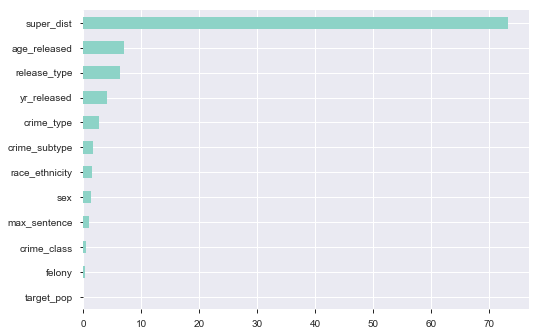

In [43]:
# Plotting Feature Importances
important_feature_names = cb_base.feature_names_
important_feature_scores = cb_base.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)
important_features.sort_values().plot(kind='barh')

#### Defining Roc_Auc Curve

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

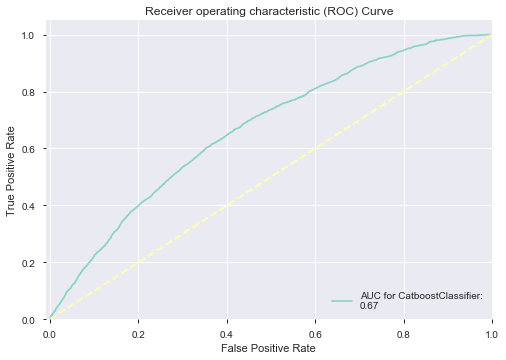

In [45]:
# Define plot_auc_roc_curve
def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, thresh  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot roc_auc_curve
y_test_pred = cb_base.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\bs_ds\bs_ds.py:1596: UserWarning: Future versions will be moving plot_confusion_matrix to bs_ds.glassboxes module.
  warnings.warn('Future versions will be moving plot_confusion_matrix to bs_ds.glassboxes module.')


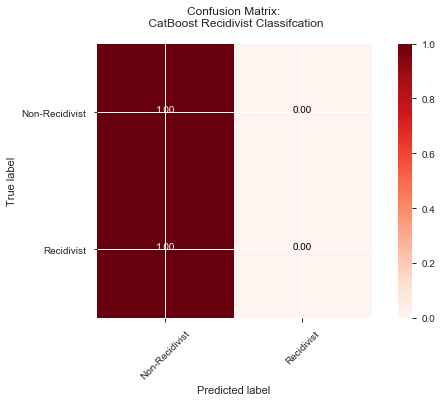

In [46]:
import itertools
from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_base.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Non-Recidivist', 'Recidivist'], normalize=True, cmap='Reds',
                      title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

### Notes Following Initial Modeling:
- The ROC-AUC Curve Shows that our model performs better than chance. 
- HOWEVE, There is a major issue with our confusion matrix.
    - There are an extremely high # of False Negatives (prisoners Predicted to be "Non-Recidivist",but were actually "Recidivist")
    - This is a serious flaw with the model and serious hinders real-world applicability. 
- This may be due to the imbalance of cases of recidivists vs non-recidivists in our dataset.

# REVISING THE MODEL
## Balancing Target Classes Using Synthetic Minority Oversampling

In [47]:
# # Define X and y 
# X = df_to_split
# y = pd.Series(df[target_col].to_numpy().ravel())
# y.name = 'recidivist'

In [ ]:
# df=pd.concat([y,X], axis=1)

In [ ]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

### Addressing the Imbalanced Class Issue
- Adding Synthetic Minority Oversampling Technique to balance out the # of recidivists(1) and non-recidivists(0)

In [48]:
from imblearn.over_sampling import SMOTE

print(pd.Series(y).value_counts())

X_resampled, y_resampled = SMOTE().fit_sample(X,y)

print(pd.Series(y_resampled).value_counts())

0    15880
1     8326
Name: recidivist, dtype: int64
1    15880
0    15880
dtype: int64


In [49]:
# Reformatting SMOTE transformed data

# X_resampled back to a dataframe
X_resampled = pd.DataFrame(X_resampled, columns = X.columns)

# X_resampled category columns back to integers
for header in category_cols:
    X_resampled[header] = X_resampled[header].astype('int')
    
# y_resampled back to a named series    
y_resampled = pd.Series(y_resampled)
y_resampled.name ='recidivist'

### Fitting a Revised Model with Balanced Classes

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [51]:
from catboost import Pool, CatBoostClassifier
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [58]:
cb_clf = CatBoostClassifier(iterations=300, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
#                            task_type='GPU')


In [59]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=5)
cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.622448670238583},
 'validation_0': {'Logloss': 0.624199576710876, 'AUC': 0.7391060371310765}}

_____________________________________________

## Visual Summary

In [60]:
# Plotting Feature Importances
important_feature_names = cb_clf.feature_names_
important_feature_scores = cb_clf.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)

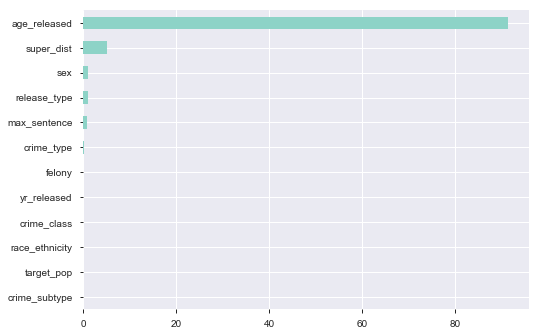

In [61]:
important_features.sort_values().plot(kind='barh')

### AUC-ROC Curve

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
y_test_pred = cb_clf.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

### Confusion Matrix


In [ ]:
# import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
                      title='Confusion Matrix: CatBoost Recidivist Classifcation\n')

# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.